In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [46]:
import pandas as pd

url='http://bit.ly/w-data'
df=pd.read_csv(url)

In [47]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [48]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


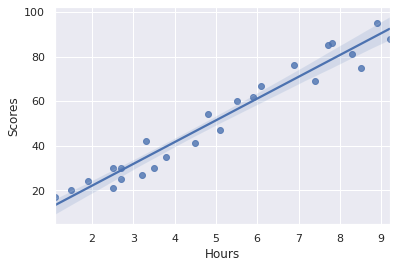

In [49]:
sns.regplot(x=df['Hours'], y='Scores', data=df)

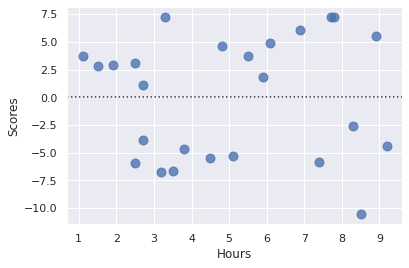

In [50]:
sns.residplot(x="Hours", y="Scores", data=df,
            scatter_kws={"s": 80});
#there is no structure in residuals, so linear regression is appropriate

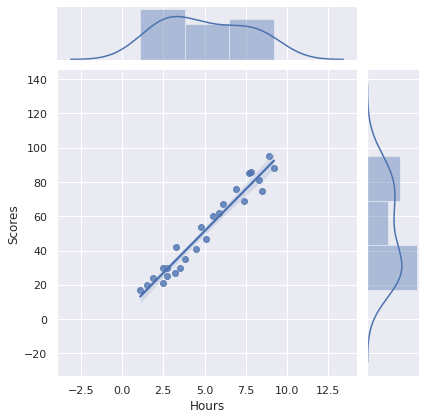

In [51]:
sns.jointplot(x="Hours", y="Scores", data=df, kind="reg")

In [52]:
y=df['Scores']
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [53]:
df.drop(['Scores'],axis=1,inplace =True)
df.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [54]:
import numpy as np

from sklearn.model_selection import KFold
m=[]
def predict(model,train,test,y,n_fold):
    #print(train.index)
    f_train=np.empty((0,1),float)
    f_test=np.empty((0,1),float)
    folds=KFold(n_splits=n_fold)
    for train_indices,val_indices in folds.split(train,y):
        #print(train_indices,val_indices)
        trainn,ytrain=train.iloc[train_indices],y.iloc[train_indices]
        testt,ytest=train.iloc[val_indices],y.iloc[val_indices]
        model.fit(trainn,ytrain)
        f_train=np.append(f_train,model.predict(testt))
        #f_test=np.append(f_test,model.predict(test))
    mode=model.fit(train,y)
    m.append(mode)
    f_test=np.append(f_test,model.predict(test))
    return  f_test.reshape(-1,1),f_train.reshape(-1,1)      

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y,shuffle=True, test_size=0.20, random_state=42)


In [56]:
from sklearn.tree import DecisionTreeRegressor
model1 =DecisionTreeRegressor(random_state=1,max_depth=3)

test_pred1 ,train_pred1=predict(model=model1,n_fold=20, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [57]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_neighbors=2)

test_pred2 ,train_pred2=predict(model=model2,n_fold=20,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [58]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
test_pred3 ,train_pred3=predict(model=model3,n_fold=20,train=x_train,test=x_test,y=y_train)

train_pred3=pd.DataFrame(train_pred3)
test_pred3=pd.DataFrame(test_pred3)

In [59]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor(n_neighbors=1)

test_pred4 ,train_pred4=predict(model=model4,n_fold=20,train=x_train,test=x_test,y=y_train)

train_pred4=pd.DataFrame(train_pred4)
test_pred4=pd.DataFrame(test_pred4)

In [60]:
from sklearn.neighbors import KNeighborsRegressor
model5 = KNeighborsRegressor(n_neighbors=3)

test_pred5 ,train_pred5=predict(model=model2,n_fold=20,train=x_train,test=x_test,y=y_train)

train_pred5=pd.DataFrame(train_pred5)
test_pred5=pd.DataFrame(test_pred5)

In [61]:
from sklearn.tree import DecisionTreeRegressor
model6 =DecisionTreeRegressor(random_state=1,max_depth=2)

test_pred6 ,train_pred6=predict(model=model1,n_fold=20, train=x_train,test=x_test,y=y_train)

train_pred6=pd.DataFrame(train_pred6)
test_pred6=pd.DataFrame(test_pred6)

In [62]:
df = pd.concat([train_pred1, train_pred2,train_pred3,train_pred4,train_pred5,train_pred6], axis=1)
df_test = pd.concat([test_pred1, test_pred2,test_pred3,test_pred4,test_pred5,test_pred6], axis=1)
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor(base_estimator=KNeighborsRegressor(),n_estimators=100, random_state=0)
model.fit(df,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=100,
                 random_state=0)

In [63]:
metrics.r2_score(y_test,model.predict(df_test))

0.9817215458871517

r2 score is 0.9817215458871517

In [64]:
metrics.mean_absolute_error(y_test,model.predict(df_test))

2.165999999999998

mean absolute error is 2.165999999999998

In [65]:
metrics.mean_squared_error(y_test,model.predict(df_test))

10.755042399999986

mean squared error is is 10.755042399999986

In [66]:
def predict_bag(num):
    
    h=[]
    for s in m:
        h.append(s.predict([[num]]))
    return h

In [71]:
print("Score of a student studying 9.25 hours a day is ",model.predict(np.array(predict_bag(9.25)).reshape(1,-1))[0])

Score of a student studying 9.25 hours a day is  80.82599999999998


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

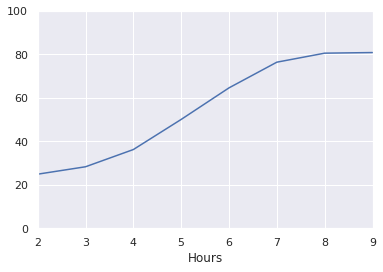

In [73]:
i=np.arange(0,10,1)
j=[model.predict(np.array(predict_bag(g)).reshape(1,-1)) for g in i]
fig = plt.figure()
ax = plt.axes(xlim=(2, 9), ylim=(0,100))
line, = ax.plot(i, j)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Plot of model')